# TD9-PHM2008 Challenge

In [1]:
## IMPORT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn import cluster
from sklearn import decomposition

#%matplotlib notebook

## Experimental data and spliting

A simple visualisation of what the data look like.

In [2]:
## DATA LOADING
fileTrain = 'PHM08_Train.csv'
fileTest = 'PHM08_Test.csv'
XTrain = pd.read_csv(fileTrain)
XTest = pd.read_csv(fileTest)
print('TRAIN:')
display(XTrain)
print('TEST:')
display(XTest)

TRAIN:


,Unit,Time,OP1,OP2,OP3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
0,1,1,10.0047,0.2501,20,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735
1,1,2,0.0015,0.0003,100,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619
2,1,3,34.9986,0.8401,60,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555
3,1,4,20.0031,0.7005,0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832
4,1,5,42.0041,0.8405,40,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40,445.00,551.02,1365.27,1147.43,3.91,...,130.21,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985
45914,218,130,42.0029,0.8415,40,445.00,550.07,1365.55,1142.21,3.91,...,130.24,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741
45915,218,131,41.9999,0.8400,40,445.00,549.92,1359.21,1150.15,3.91,...,129.86,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978
45916,218,132,35.0007,0.8419,60,449.44,556.55,1380.05,1145.49,5.48,...,182.03,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761


TEST:


,Unit,Time,OP1,OP2,OP3,SM1,SM2,SM3,SM4,SM5,...,SM12,SM13,SM14,SM15,SM16,SM17,SM18,SM19,SM20,SM21
0,1,1,0.0016,0.0002,100,518.67,642.88,1587.21,1412.44,14.62,...,521.44,2388.10,8124.04,8.4363,0.03,393,2388,100.00,38.97,23.3029
1,1,2,24.9993,0.6215,80,462.54,536.45,1262.64,1055.44,7.05,...,164.32,2027.95,7865.20,10.8935,0.02,308,1915,84.93,14.29,8.6686
2,1,3,0.0004,0.0000,100,518.67,642.65,1589.75,1409.54,14.62,...,521.15,2388.19,8121.12,8.4620,0.03,393,2388,100.00,38.91,23.2693
3,1,4,10.0034,0.2500,20,489.05,604.44,1499.93,1315.34,10.52,...,371.42,2388.21,8123.53,8.6815,0.03,369,2319,100.00,28.60,17.0930
4,1,5,0.0024,0.0011,100,518.67,642.74,1585.47,1408.12,14.62,...,520.86,2388.13,8118.30,8.4617,0.03,392,2388,100.00,38.82,23.3124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29815,218,86,35.0013,0.8404,60,449.44,556.14,1367.80,1129.58,5.48,...,182.99,2388.01,8065.66,9.3426,0.02,335,2223,100.00,14.62,8.8457
29816,218,87,25.0041,0.6200,80,462.54,536.97,1262.93,1051.83,7.05,...,164.96,2028.18,7871.94,10.9421,0.02,306,1915,84.93,14.41,8.4964
29817,218,88,20.0043,0.7000,0,491.19,607.93,1492.15,1252.99,9.35,...,314.86,2388.09,8059.65,9.2862,0.02,368,2324,100.00,24.42,14.5244
29818,218,89,20.0037,0.7000,0,491.19,607.85,1490.80,1254.70,9.35,...,314.86,2388.09,8062.13,9.2599,0.02,365,2324,100.00,24.45,14.5694


Sort the data and get the data set from panda to numpy array.

In [3]:
## DATA "SPLITING"
label = ['Unit', 'Time']
op = ['OP1', 'OP2', 'OP3']
sensor = []
for idx in range(21):
    sensor.append('SM{:d}'.format(idx+1))
# Order
XTrain = XTrain.sort_values(by=label)
XTest = XTest.sort_values(by=label)
# Split train dataset
XTrainLabel = XTrain[label].to_numpy()
XTrainOP = XTrain[op].to_numpy()
XTrainSensor = XTrain[sensor].to_numpy()
# Split test datset
XTestLabel = XTest[label].to_numpy()
XTestOP = XTest[op].to_numpy()
XTestSensor = XTest[sensor].to_numpy()

### visualisation of how the data evolue with time

Text(0.5, 0.98, 'UNIT 1')

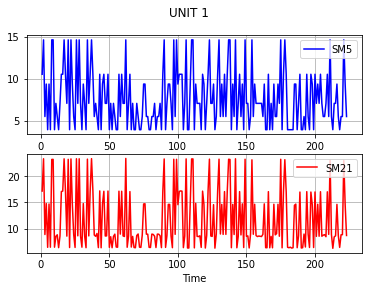

In [4]:
## ILLUSTRATION OF AN UNIT TIME LINE
unit = 1
sigA = 4    # Sensor number [1,...,21]-1 
sigB = 20   # Sensor number [1,...,21]-1
fig = plt.figure(figsize=(6, 4))
ax0 = fig.add_subplot(2, 1, 1)
ax0.plot(XTrainLabel[XTrainLabel[:, 0]==unit, 1], XTrainSensor[XTrainLabel[:, 0]==unit, sigA],
        'b', label='SM{:d}'.format(sigA+1))
ax0.set_xlabel('Time')
ax0.legend(loc='upper right')
ax0.grid(True)
ax1 = fig.add_subplot(2, 1, 2, sharex=ax0)
ax1.plot(XTrainLabel[XTrainLabel[:, 0]==unit, 1], XTrainSensor[XTrainLabel[:, 0]==unit, sigB],
        'r', label='SM{:d}'.format(sigB+1))
ax1.set_xlabel('Time')
ax1.legend(loc='upper right')
ax1.grid(True)
fig.suptitle('UNIT {:d}'.format(unit))

## Operational mode
### Normalisation of OP

In [5]:
# OP's VARIABLES SCALING
scalerOP = preprocessing.MinMaxScaler(feature_range=(-1, 1))
XTrainOP = scalerOP.fit_transform(XTrainOP)
XTestOP = scalerOP.transform(XTestOP)

### Plot of OP
Here we can use two methods:
- 1st: a 3 dimension plot.

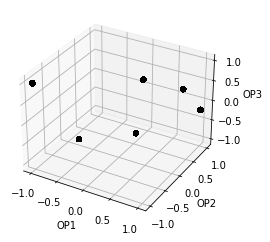

In [6]:
# Visual operation mode-3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XTrainOP[:,0], XTrainOP[:,1], XTrainOP[:,2], c='k')  
ax.set_zlabel('OP3')
ax.set_ylabel('OP2')
ax.set_xlabel('OP1')
plt.show()

- 2nd: 3 two-dimension plots.

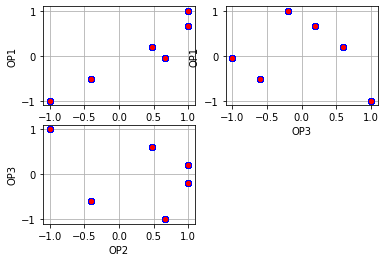

In [7]:
# Visual operation mode-3*2D
fig = plt.figure(figsize=(6, 4))
cpl = [[0, 1], [0, 2], [2, 1]]
for idx in range(len(cpl)):
    ax = fig.add_subplot(2, 2, idx+1)
    ax.plot(XTrainOP[:, cpl[idx][1]], XTrainOP[:, cpl[idx][0]], 'ob')
    ax.plot(XTestOP[:, cpl[idx][1]], XTestOP[:, cpl[idx][0]], '.r')
    ax.set_xlabel('OP{:d}'.format(cpl[idx][1]+1))
    ax.set_ylabel('OP{:d}'.format(cpl[idx][0]+1))
    ax.grid(True)

### Clustering

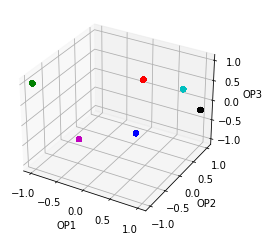

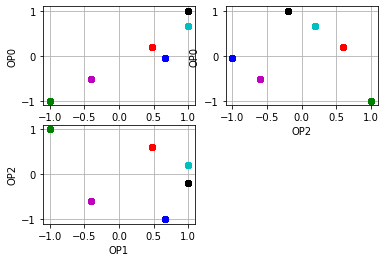

In [8]:
## CLUSTERING OPERATIONAL MODES
nbCluster = 6
kmeans = cluster.KMeans(n_clusters=nbCluster).fit(XTrainOP)
YTrainOP = kmeans.labels_
YTrainOP = YTrainOP.reshape(len(YTrainOP), 1)
YTestOP = kmeans.predict(XTestOP)
YTestOP = YTestOP.reshape(len(YTestOP), 1)

# Visual control-3D
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
color = ['r', 'b', 'g', 'k', 'm', 'c']
for idy in range(nbCluster):
    ax.scatter(XTrainOP[YTrainOP[:, 0]==idy, 0], XTrainOP[YTrainOP[:, 0]==idy, 1], XTrainOP[YTrainOP[:, 0]==idy, 2], c=color[idy])  
ax.set_zlabel('OP3')
ax.set_ylabel('OP2')
ax.set_xlabel('OP1')
plt.show()

# Visual control-3*2D
fig = plt.figure(figsize=(6, 4))
cpl = [[0, 1], [0, 2], [2, 1]]
color = ['r', 'b', 'g', 'k', 'm', 'c']
for idx in range(len(cpl)):
    ax = fig.add_subplot(2, 2, idx+1)
    for idy in range(nbCluster):
        ax.plot(XTrainOP[YTrainOP[:, 0]==idy, cpl[idx][1]],
                XTrainOP[YTrainOP[:, 0]==idy, cpl[idx][0]],
                'o', color=color[idy])
        ax.plot(XTestOP[YTestOP[:, 0]==idy, cpl[idx][1]],
                XTestOP[YTestOP[:, 0]==idy, cpl[idx][0]],
                '.', color=color[idy])
    ax.set_xlabel('OP{:d}'.format(cpl[idx][1]))
    ax.set_ylabel('OP{:d}'.format(cpl[idx][0]))
    ax.grid(True)

### Number of observations in each modes

In [9]:
## OBSERVATIONS PER OPERATIONAL MODE
for idx in range(nbCluster):
    print('OM{:d}: {:5d} + {:5d} = {:5d} observations'.format(
        idx, np.sum(YTrainOP[:, 0]==idx), np.sum(YTestOP[:, 0]==idx),
        np.sum(YTrainOP[:, 0]==idx)+np.sum(YTestOP[:, 0]==idx)))

OM0:  6881 +  4437 = 11318 observations
OM1:  6771 +  4470 = 11241 observations
OM2:  6954 +  4454 = 11408 observations
OM3: 11571 +  7540 = 19111 observations
OM4:  6882 +  4452 = 11334 observations
OM5:  6859 +  4467 = 11326 observations


### Evolution of operational mode

Text(0.5, 0.98, 'UNIT 1')

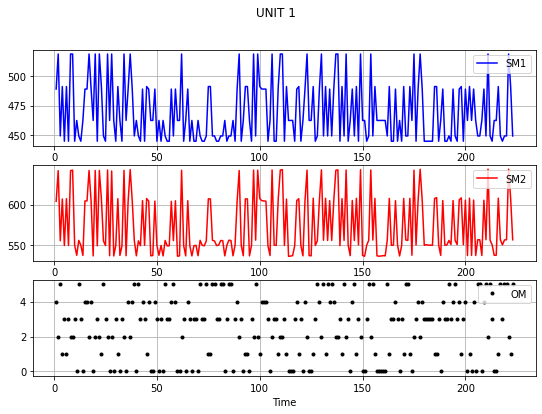

In [10]:
## ILLUSTRATION
unit = 1
sigA = 0
sigB = 1
fig = plt.figure(figsize=(9, 6))
ax0 = fig.add_subplot(3, 1, 1)
ax0.plot(XTrainLabel[XTrainLabel[:, 0]==unit, 1], XTrainSensor[XTrainLabel[:, 0]==unit, sigA],
        'b', label='SM{:d}'.format(sigA+1))
ax0.set_xlabel('Time')
ax0.legend(loc='upper right')
ax0.grid(True)
ax1 = fig.add_subplot(3, 1, 2, sharex=ax0)
ax1.plot(XTrainLabel[XTrainLabel[:, 0]==unit, 1], XTrainSensor[XTrainLabel[:, 0]==unit, sigB],
        'r', label='SM{:d}'.format(sigB+1))
ax1.set_xlabel('Time')
ax1.legend(loc='upper right')
ax1.grid(True)
ax2 = fig.add_subplot(3, 1, 3, sharex=ax0)
ax2.plot(XTrainLabel[XTrainLabel[:, 0]==unit, 1], YTrainOP[XTrainLabel[:, 0]==unit, 0],
        '.k', label='OM')
ax2.set_xlabel('Time')
ax2.legend(loc='upper right')
ax2.grid(True)
fig.suptitle('UNIT {:d}'.format(unit))

### Number of Failure/Start in each mode

In [11]:
## DATASET AT FAILURE TIME
XTrainLabelFailure = []
YTrainOPFailure = []
XTrainSensorFailure = []
for idx in range(1, np.max(XTrainLabel[:, 0])+1):
    ind = np.argmax(XTrainLabel[XTrainLabel[:, 0]==idx, 1])
    tmpLabel = XTrainLabel[XTrainLabel[:, 0]==idx, :][ind, :]
    tmpOP = YTrainOP[XTrainLabel[:, 0]==idx][ind]
    tmpSensor = XTrainSensor[XTrainLabel[:, 0]==idx, :][ind, :]
    if idx==1:
        XTrainLabelFailure = tmpLabel
        YTrainOPFailure = tmpOP
        XTrainSensorFailure = tmpSensor
    else:
        XTrainLabelFailure = np.vstack((XTrainLabelFailure, tmpLabel))
        YTrainOPFailure = np.vstack((YTrainOPFailure, tmpOP))
        XTrainSensorFailure = np.vstack((XTrainSensorFailure, tmpSensor))
for idx in range(nbCluster):
    print('OM{:d}: {:5d} failures'.format(idx, np.sum(YTrainOPFailure==idx)))

OM0:    22 failures
OM1:     6 failures
OM2:    21 failures
OM3:   103 failures
OM4:    46 failures
OM5:    20 failures


In [12]:
## DATASET AT TIME 0
XTrainLabelStart = []
YTrainOPStart = []
XTrainSensorStart = []
for idx in range(1, np.max(XTrainLabel[:, 0])+1):
    ind = np.argmin(XTrainLabel[XTrainLabel[:, 0]==idx, 1])
    tmpLabel = XTrainLabel[XTrainLabel[:, 0]==idx, :][ind, :]
    tmpOP = YTrainOP[XTrainLabel[:, 0]==idx][ind]
    tmpSensor = XTrainSensor[XTrainLabel[:, 0]==idx, :][ind, :]
    if idx==1:
        XTrainLabelStart = tmpLabel
        YTrainOPStart = tmpOP
        XTrainSensorStart = tmpSensor
    else:
        XTrainLabelStart = np.vstack((XTrainLabelStart, tmpLabel))
        YTrainOPStart = np.vstack((YTrainOPStart, tmpOP))
        XTrainSensorStart = np.vstack((XTrainSensorStart, tmpSensor))
for idx in range(nbCluster):
    print('OM{:d}: {:5d} start'.format(idx, np.sum(YTrainOPStart==idx)))

OM0:    45 start
OM1:    36 start
OM2:    42 start
OM3:    42 start
OM4:    30 start
OM5:    23 start


## Degradation Indicator
### Normalisation of sensor data

In [29]:
## NORMALIZE SENSOR DATASETS
lScaler = []
for idx in range(nbCluster):
    lScaler.append(preprocessing.StandardScaler()) # StandardScaler() / MinMaxScaler(feature_range=(-1, 1)) 
    lScaler[idx].fit(XTrainSensor[YTrainOP[:, 0]==idx, :])  
    XTrainSensor[YTrainOP[:, 0]==idx, :] = lScaler[idx].transform(XTrainSensor[YTrainOP[:, 0]==idx, :])
    XTestSensor[YTestOP[:, 0]==idx, :] = lScaler[idx].transform(XTestSensor[YTestOP[:, 0]==idx, :])

In [30]:
## DATASET AT FAILURE TIME
XTrainLabelFailure = []
YTrainOPFailure = []
XTrainSensorFailure = []
for idx in range(1, np.max(XTrainLabel[:, 0])+1):
    ind = np.argmax(XTrainLabel[XTrainLabel[:, 0]==idx, 1])
    tmpLabel = XTrainLabel[XTrainLabel[:, 0]==idx, :][ind, :]
    tmpOP = YTrainOP[XTrainLabel[:, 0]==idx][ind]
    tmpSensor = XTrainSensor[XTrainLabel[:, 0]==idx, :][ind, :]
    if idx==1:
        XTrainLabelFailure = tmpLabel
        YTrainOPFailure = tmpOP
        XTrainSensorFailure = tmpSensor
    else:
        XTrainLabelFailure = np.vstack((XTrainLabelFailure, tmpLabel))
        YTrainOPFailure = np.vstack((YTrainOPFailure, tmpOP))
        XTrainSensorFailure = np.vstack((XTrainSensorFailure, tmpSensor))
for idx in range(nbCluster):
    print('OM{:d}: {:5d} failures'.format(idx, np.sum(YTrainOPFailure==idx)))

OM0:    22 failures
OM1:     6 failures
OM2:    21 failures
OM3:   103 failures
OM4:    46 failures
OM5:    20 failures


In [31]:
## DATASET AT TIME 0
XTrainLabelStart = []
YTrainOPStart = []
XTrainSensorStart = []
for idx in range(1, np.max(XTrainLabel[:, 0])+1):
    ind = np.argmin(XTrainLabel[XTrainLabel[:, 0]==idx, 1])
    tmpLabel = XTrainLabel[XTrainLabel[:, 0]==idx, :][ind, :]
    tmpOP = YTrainOP[XTrainLabel[:, 0]==idx][ind]
    tmpSensor = XTrainSensor[XTrainLabel[:, 0]==idx, :][ind, :]
    if idx==1:
        XTrainLabelStart = tmpLabel
        YTrainOPStart = tmpOP
        XTrainSensorStart = tmpSensor
    else:
        XTrainLabelStart = np.vstack((XTrainLabelStart, tmpLabel))
        YTrainOPStart = np.vstack((YTrainOPStart, tmpOP))
        XTrainSensorStart = np.vstack((XTrainSensorStart, tmpSensor))
for idx in range(nbCluster):
    print('OM{:d}: {:5d} start'.format(idx, np.sum(YTrainOPStart==idx)))

OM0:    45 start
OM1:    36 start
OM2:    42 start
OM3:    42 start
OM4:    30 start
OM5:    23 start


### Reduce of dimension(PCA)

In [32]:
## PCA OF SENSORS FOR EACH OPERATIONAL MODE
lPCA = []
nbCompo = 9
for idx in range(nbCluster):
    lPCA.append(decomposition.PCA(n_components=nbCompo, svd_solver='full'))
    lPCA[idx].fit(XTrainSensor[YTrainOP[:, 0]==idx, :])
    # lPCA[idx].fit(XTrainSensorFailure[YTrainOPFailure[:, 0]==idx, :])
    print('OM{:d}: {}'.format(idx, np.around(np.cumsum(lPCA[idx].explained_variance_ratio_), 3)))
    
    
nbCompo = 2     # Determined though the analysis of explained variance ratios
XTrainSensorFailurePca = np.empty((XTrainSensorFailure.shape[0], nbCompo))
XTrainSensorStartPca = np.empty((XTrainSensorStart.shape[0], nbCompo))
XTrainSensorPca = np.empty((XTrainSensor.shape[0], nbCompo))
for idx in range(nbCluster):
    XTrainSensorFailurePca[YTrainOPFailure[:, 0]==idx, :] = lPCA[idx].transform(
        XTrainSensorFailure[YTrainOPFailure[:, 0]==idx, :])[:, 0:nbCompo]
    XTrainSensorStartPca[YTrainOPStart[:, 0]==idx, :] = lPCA[idx].transform(
        XTrainSensorStart[YTrainOPStart[:, 0]==idx, :])[:, 0:nbCompo]
    XTrainSensorPca[YTrainOP[:, 0]==idx, :] = lPCA[idx].transform(
        XTrainSensor[YTrainOP[:, 0]==idx, :])[:, 0:nbCompo]

OM0: [0.353 0.548 0.609 0.662 0.714 0.764 0.811 0.857 0.9  ]
OM1: [0.509 0.664 0.711 0.751 0.784 0.815 0.844 0.87  0.896]
OM2: [0.586 0.728 0.793 0.822 0.849 0.873 0.895 0.916 0.934]
OM3: [0.338 0.585 0.641 0.695 0.747 0.799 0.844 0.881 0.912]
OM4: [0.606 0.73  0.762 0.794 0.825 0.855 0.883 0.908 0.931]
OM5: [0.375 0.611 0.672 0.721 0.768 0.81  0.847 0.88  0.911]


PCA results gives us how much information if we use this amount of axes.   
For example, in OM0, if we choose only 1 dimension, we will have only 33.8% of the information.   
In OM1, if we choose only 2 dimension, we will have only 58.5% of the information.   

In [33]:
## BARYCENTER OF PROJECTED SENSORS AT FAILURE TIME FOR EACH MODE 
for idx in range(nbCluster):
    tmpSensor = np.mean(XTrainSensorFailurePca[YTrainOPFailure[:, 0]==idx, :], axis=0)
    if idx==0:
        XTrainSensorPcaCentre = tmpSensor 
    else:
        XTrainSensorPcaCentre = np.vstack((XTrainSensorPcaCentre, tmpSensor))

Visualisation of PCA result

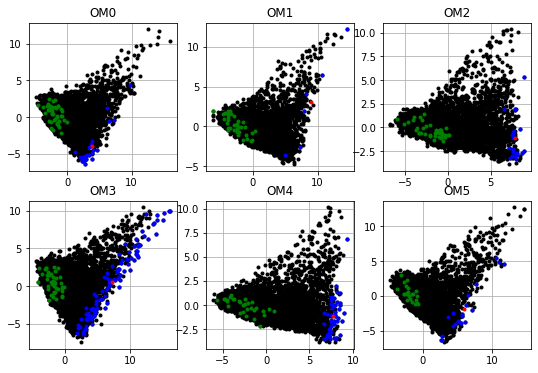

In [40]:
## ILLUSTRATION OF PROJECTED SUBSPACE
fig = plt.figure(figsize=(9, 6))
for idx in range(nbCluster):
    ax = fig.add_subplot(2, 3, idx+1)
    ax.plot(XTrainSensorPca[YTrainOP[:, 0]==idx, 0], XTrainSensorPca[YTrainOP[:, 0]==idx, 1], '.k')
    ax.plot(XTrainSensorStartPca[YTrainOPStart[:, 0]==idx, 0], 
            XTrainSensorStartPca[YTrainOPStart[:, 0]==idx, 1], '.g')
    ax.plot(XTrainSensorFailurePca[YTrainOPFailure[:, 0]==idx, 0], 
            XTrainSensorFailurePca[YTrainOPFailure[:, 0]==idx, 1], '.b')
    ax.plot(XTrainSensorPcaCentre[idx, 0], XTrainSensorPcaCentre[idx, 1], '.r')
    ax.grid(True)
    ax.set_title('OM{:d}'.format(idx))

### Degradation indicator calculation
Distance

In [41]:
## DISTANCE TO THE CENTER ASSOCIATED TO THE OPERATIONAL MODE
XTrainDist = np.empty((XTrainSensorPca.shape[0], 1))
for idx in range(nbCluster):
    XTrainDist[YTrainOP[:, 0]==idx, 0] = np.sqrt(np.sum((XTrainSensorPca[YTrainOP[:, 0]==idx, :]-np.tile(
        XTrainSensorPcaCentre[idx, :], (np.sum(YTrainOP[:, 0]==idx), 1)))**2, axis=1))

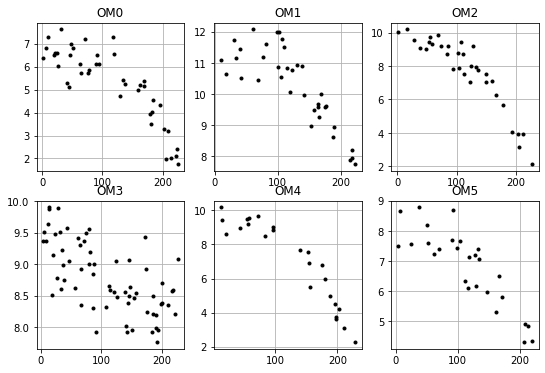

In [42]:
## ILLUSTRATION OF THESE DISTANCES DEPENDING ON TIME AND ON OM
unit = 29
fig = plt.figure(figsize=(9, 6))
for idx in range(nbCluster):
    ax = fig.add_subplot(2, 3, idx+1)
    ax.plot(XTrainLabel[np.logical_and(XTrainLabel[:, 0]==unit, YTrainOP[:, 0]==idx), 1],
            XTrainDist[np.logical_and(XTrainLabel[:, 0]==unit, YTrainOP[:, 0]==idx), 0], '.k')
    ax.grid(True)
    ax.set_title('OM{:d}'.format(idx))

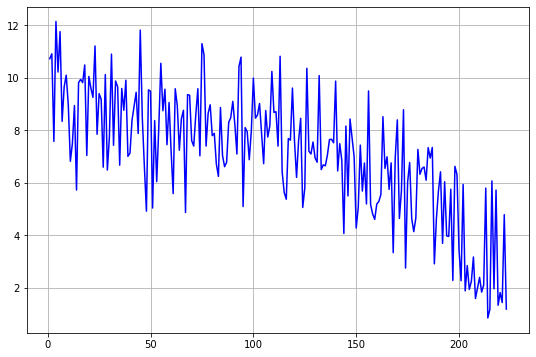

In [43]:
## ILLUSTRATION OF MERGED OM DISTANCES ON A SINGLE UNIT
unit = 1
fig = plt.figure(figsize=(9, 6))
ax =  fig.add_subplot(1, 1, 1)
ax.plot(XTrainLabel[XTrainLabel[:, 0]==unit, 1], XTrainDist[XTrainLabel[:, 0]==unit, 0], 'b')
ax.grid(True)

### All of dataset

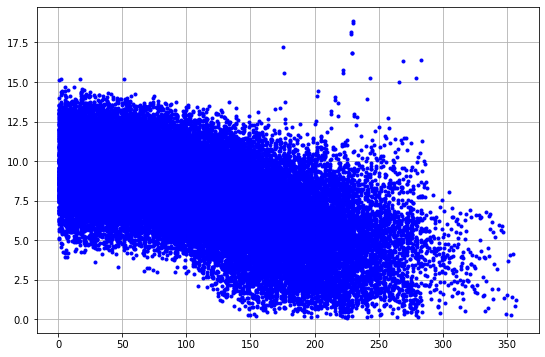

In [45]:
## ILLUSTRATION OF ALL UNITS
fig = plt.figure(figsize=(9, 6))
ax =  fig.add_subplot(1, 1, 1)
ax.plot(XTrainLabel[:, 1], XTrainDist[:, 0], '.b')
ax.grid(True)

In [46]:
## DISTANCE BETWEEEN START AND BARYCENTER
XTrainStartDist = np.empty((XTrainSensorStartPca.shape[0], 1))
for idx in range(nbCluster):
    XTrainStartDist[YTrainOPStart[:, 0]==idx, 0] = np.sqrt(np.sum((XTrainSensorStartPca[YTrainOPStart[:, 0]==idx, :]-np.tile(
        XTrainSensorPcaCentre[idx, :], (np.sum(YTrainOPStart[:, 0]==idx), 1)))**2, axis=1))

In [47]:
## DISTANCE BETWEEEN FAILURE AND BARYCENTER
XTrainFailureDist = np.empty((XTrainSensorFailurePca.shape[0], 1))
for idx in range(nbCluster):
    XTrainFailureDist[YTrainOPFailure[:, 0]==idx, 0] = np.sqrt(np.sum((XTrainSensorFailurePca[YTrainOPFailure[:, 0]==idx, :]-np.tile(
        XTrainSensorPcaCentre[idx, :], (np.sum(YTrainOPFailure[:, 0]==idx), 1)))**2, axis=1))

In [48]:
## DETERMINE DISTANCE "NORMALIZATION" COEFFICIENTS
mode = 'Start' # Start / Failure / None
for idx in range(nbCluster):
    if mode=='Start':
        tmpSensor = np.sum(XTrainStartDist[YTrainOPStart[:, 0]==idx, :]**2, axis=0)
        tmpSensor = tmpSensor/(np.sum(YTrainOPStart[:, 0]==idx)-1)
    elif mode=='Failure':
        tmpSensor = np.sum(XTrainFailureDist[YTrainOPFailure[:, 0]==idx, :]**2, axis=0)
        tmpSensor = tmpSensor/(np.sum(YTrainOPFailure[:, 0]==idx)-1)
    else:
        tmpSensor = 1
    tmpSensor = np.sqrt(tmpSensor)
    if idx==0:
        XTrainSensorPcaNorm = tmpSensor 
    else:
        XTrainSensorPcaNorm = np.vstack((XTrainSensorPcaNorm, tmpSensor))

In [49]:
## APPLICATION OF THE NORMALISATION
XTrainDistNorm = np.empty(XTrainDist.shape)
for idx in range(nbCluster):
    XTrainDistNorm[YTrainOP[:, 0]==idx, 0] = XTrainDist[YTrainOP[:, 0]==idx, 0]/XTrainSensorPcaNorm[idx]

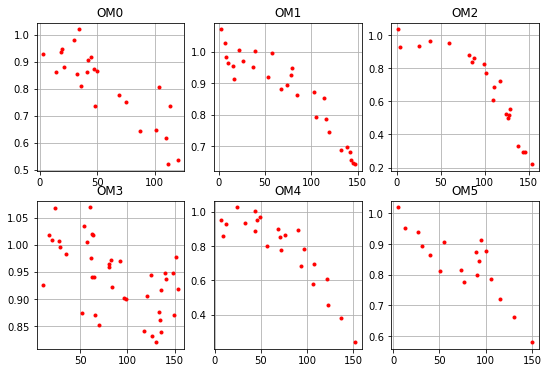

In [55]:
## ILLUSTRATION OF THESE "NORMALISED" DISTANCES DEPENDING ON TIME AND ON OM
unit = 20
fig = plt.figure(figsize=(9, 6))
for idx in range(nbCluster):
    ax = fig.add_subplot(2, 3, idx+1)
    ax.plot(XTrainLabel[np.logical_and(XTrainLabel[:, 0]==unit, YTrainOP[:, 0]==idx), 1],
            XTrainDistNorm[np.logical_and(XTrainLabel[:, 0]==unit, YTrainOP[:, 0]==idx), 0], '.r')
    ax.grid(True)
    ax.set_title('OM{:d}'.format(idx))

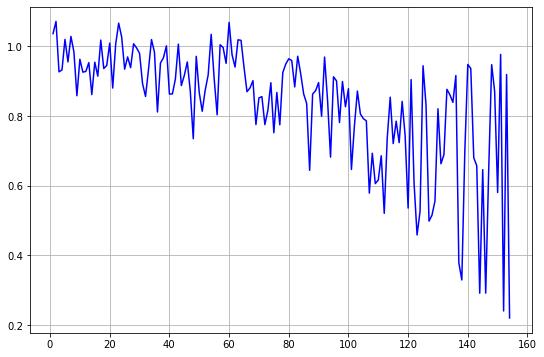

In [56]:
## ILLUSTRATION OF ALL OPS ON A SINGLE UNIT
unit = 20
fig = plt.figure(figsize=(9, 6))
ax =  fig.add_subplot(1, 1, 1)
ax.plot(XTrainLabel[XTrainLabel[:, 0]==unit, 1], XTrainDistNorm[XTrainLabel[:, 0]==unit, 0], 'b')
ax.grid(True)

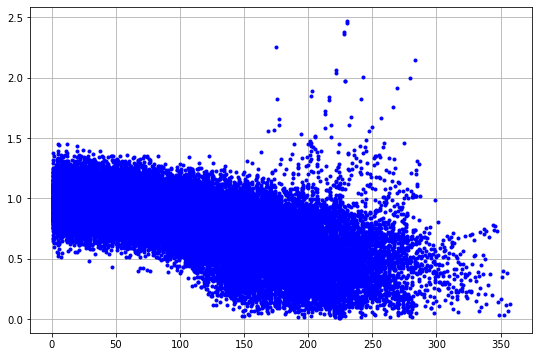

In [52]:
## ILLUSTRATION OF ALL UNITS
fig = plt.figure(figsize=(9, 6))
ax =  fig.add_subplot(1, 1, 1)
ax.plot(XTrainLabel[:, 1], XTrainDistNorm[:, 0], '.b')
ax.grid(True)

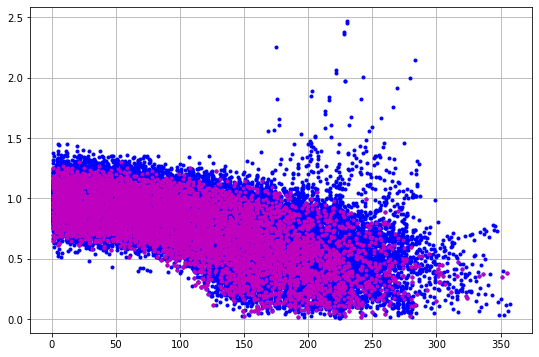

In [53]:
## ILLUSTRATION OF ALL UNITS ON A SUBSET OF MODES
fig = plt.figure(figsize=(9, 6))
ax =  fig.add_subplot(1, 1, 1)
ax.plot(XTrainLabel[:, 1], XTrainDistNorm[:, 0], '.b')
om = [4]
ax.plot(XTrainLabel[np.isin(YTrainOP[:, 0], om), 1], XTrainDistNorm[np.isin(YTrainOP[:, 0], om), 0], '.m')
ax.grid(True)